In [ ]:
!pip install mne # Use only on Google Colab

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mne.channels import make_standard_montage
from mne import create_info
from mne.io import RawArray
plt.set_cmap('viridis')
#matplotlib.use("Qt5Agg")
plt.rcParams['figure.figsize'] = [10, 5]

path_data = '../data/mn8-cvep'
path_mount = ''

<Figure size 640x480 with 0 Axes>

In [2]:
header = [
    "Timestamp",
    "EEG.Counter",
    "EEG.Interpolated",
    "EEG.T7",
    "EEG.T8",
    "EEG.RawCq",
    "EEG.Battery",
    "EEG.BatteryPercent",
    "MarkerIndex",
    "MarkerType",
    "MarkerValueInt",
    "EEG.MarkerHardware",
    "CQ.T7",
    "CQ.T8",
    "CQ.Overall",
    "EQ.SampleRateQuality",
    "EQ.OVERALL",
    "EQ.T7",
    "EQ.T8",
    "MOT.CounterMems",
    "MOT.InterpolatedMems",
    "MOT.Q0",
    "MOT.Q1",
    "MOT.Q2",
    "MOT.Q3",
    "MC.Action",
    "MC.ActionPower",
    "MC.IsActive",
    "PM.Attention.IsActive",
    "PM.Attention.Scaled",
    "PM.Attention.Raw",
    "PM.Attention.Min",
    "PM.Attention.Max",
    "PM.CognitiveStress.IsActive",
    "PM.CognitiveStress.Scaled",
    "PM.CognitiveStress.Raw",
    "PM.CognitiveStress.Min",
    "PM.CognitiveStress.Max",
    "POW.T7.Theta",
    "POW.T7.Alpha",
    "POW.T7.BetaL",
    "POW.T7.BetaH",
    "POW.T7.Gamma",
    "POW.T8.Theta",
    "POW.T8.Alpha",
    "POW.T8.BetaL",
    "POW.T8.BetaH",
    "POW.T8.Gamma"
]
filename = 'yyhh_MN8_214336_2024.03.10T20.17.39.04.00.md.mc.pm.bp.csv'
fs = 128
skiprows = fs * 7 + 2
df = pd.read_csv(path_data + '/' + filename, skiprows=skiprows, names=header)
df

,Timestamp,EEG.Counter,EEG.Interpolated,EEG.T7,EEG.T8,EEG.RawCq,EEG.Battery,EEG.BatteryPercent,MarkerIndex,MarkerType,...,POW.T7.Theta,POW.T7.Alpha,POW.T7.BetaL,POW.T7.BetaH,POW.T7.Gamma,POW.T8.Theta,POW.T8.Alpha,POW.T8.BetaL,POW.T8.BetaH,POW.T8.Gamma
0,1.710116e+09,91.0,0.0,4207.238281,4125.333496,0.0,2.0,40.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.710116e+09,92.0,0.0,4210.095215,4121.523926,0.0,2.0,40.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.710116e+09,93.0,0.0,4209.143066,4126.761719,0.0,2.0,40.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.710116e+09,94.0,0.0,4208.190430,4137.238281,0.0,2.0,40.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.710116e+09,95.0,0.0,4211.523926,4140.095215,0.0,2.0,40.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7684,1.710116e+09,24.0,0.0,4188.666504,4091.523926,0.0,2.0,39.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7685,1.710116e+09,25.0,0.0,4193.428711,4100.571289,0.0,2.0,39.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7686,1.710116e+09,26.0,0.0,4184.856934,4095.809570,0.0,2.0,39.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7687,1.710116e+09,27.0,0.0,4182.476074,4092.000000,0.0,2.0,39.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Device information
eeg = df[['EEG.T7', 'EEG.T8']]
rescale = 1e6
chs = ['T7', 'T8']

Creating RawArray with float64 data, n_channels=2, n_times=7689
    Range : 0 ... 7688 =      0.000 ...    60.062 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=7689
    Range : 0 ... 7688 =      0.000 ...    60.062 secs
Ready.
Using matplotlib as 2D backend.


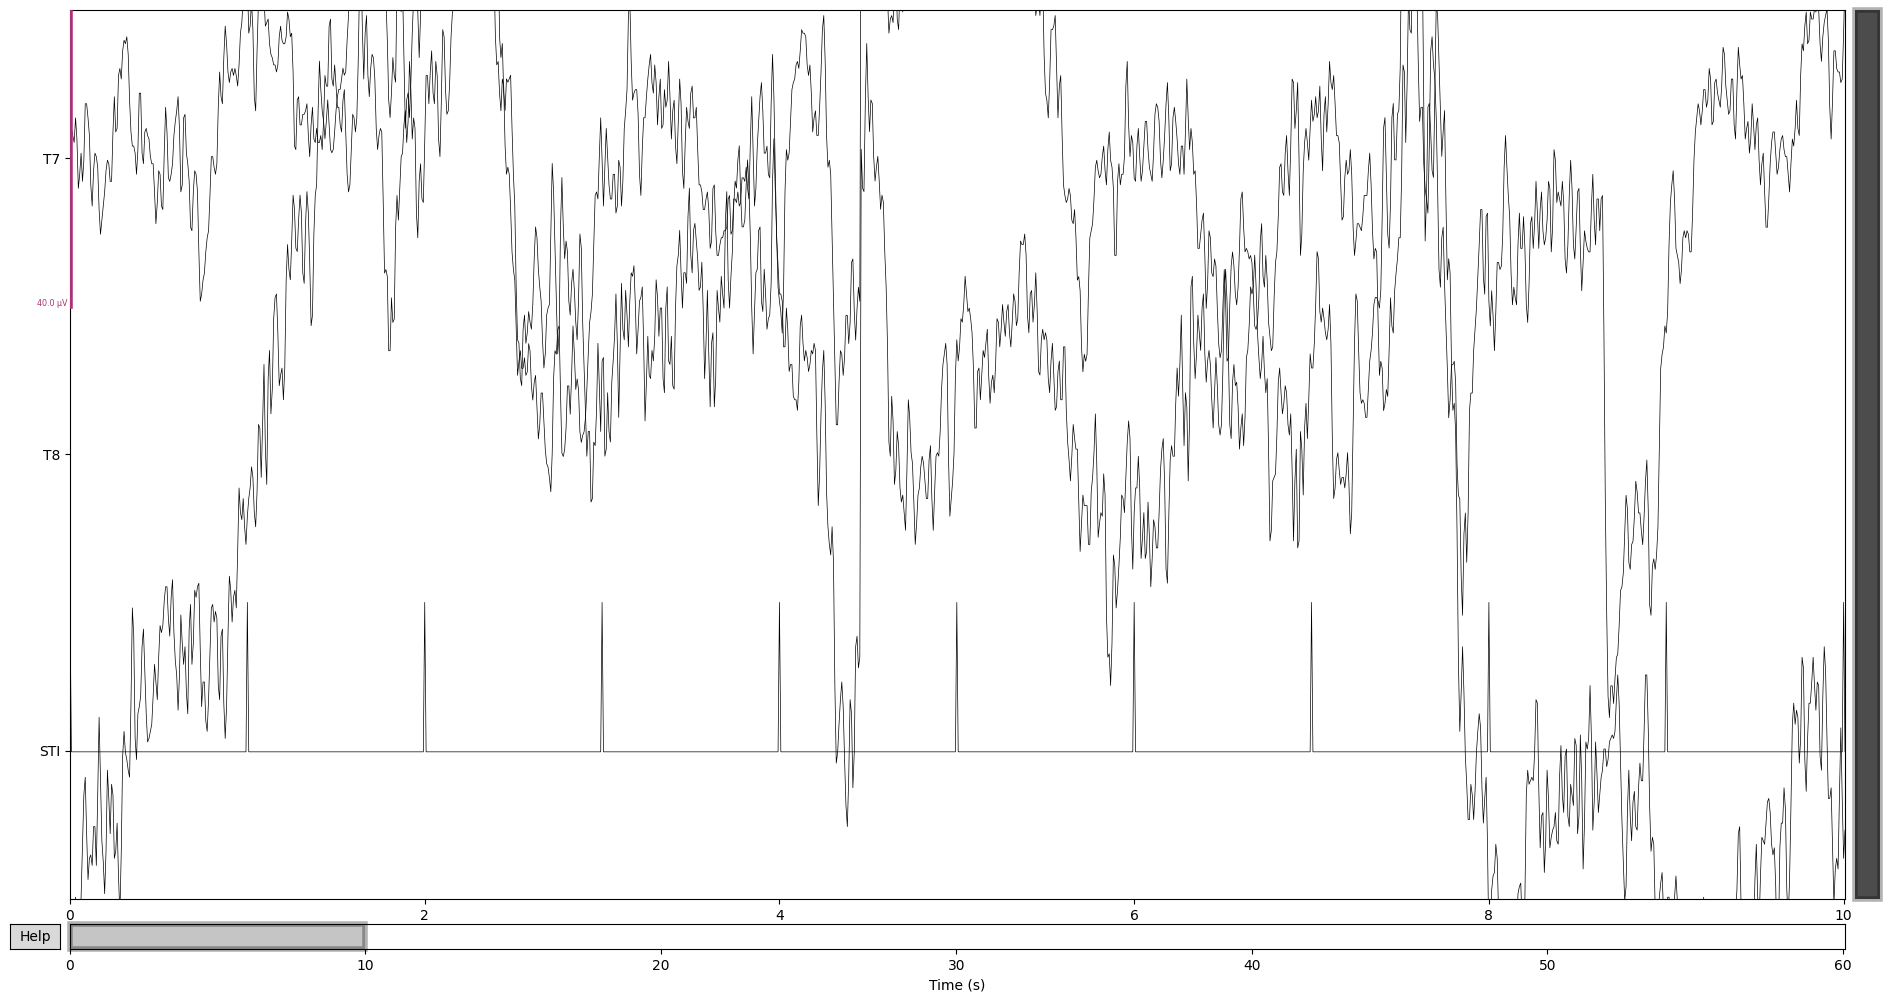

In [4]:
rec = RawArray(eeg.T / rescale, create_info(chs, fs, ch_types='eeg'))

# Total time and sampling rate
total_time = int(rec.n_times) / fs # seconds
sampling_rate = fs # Hz

# Calculate total number of samples
total_samples = int(total_time * sampling_rate)

# Calculate number of samples per trigger
samples_per_trigger = total_samples // 4

# Create an empty array of the size of the total number of samples
triggers = np.zeros((1,total_samples))

# Fill the array with the trigger values
for i in range(4):
    start = i * samples_per_trigger 
    for j in range(start, start + samples_per_trigger, sampling_rate):
        triggers[0, j] = i + 1

stim_raw = RawArray(triggers, create_info(['STI'], rec.info['sfreq'], ch_types=['stim']))
rec.add_channels([stim_raw])

 # Set the standard 10-20 montage
montage = make_standard_montage('standard_1020')
rec.set_montage(montage)
rec.plot()
plt.show()

Effective window size : 16.000 (s)


C:\Users\miche\Desktop\GTec\Projects\UnicornUtilities\.venv\lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


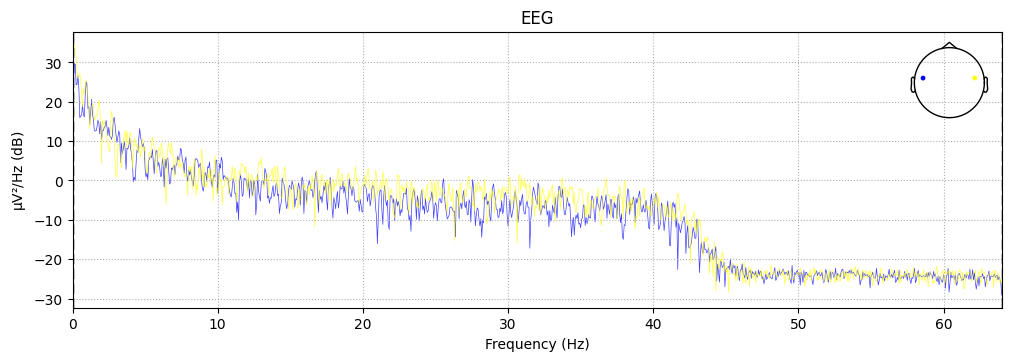

In [5]:
# Compute PSD
# Data is pre-filtered
Pxx = rec.compute_psd(fmin=0, fmax=fs/2)
Pxx.plot()
plt.show()

Trigger channel STI has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
63 events found on stim channel STI
Event IDs: [1 2 3 4]


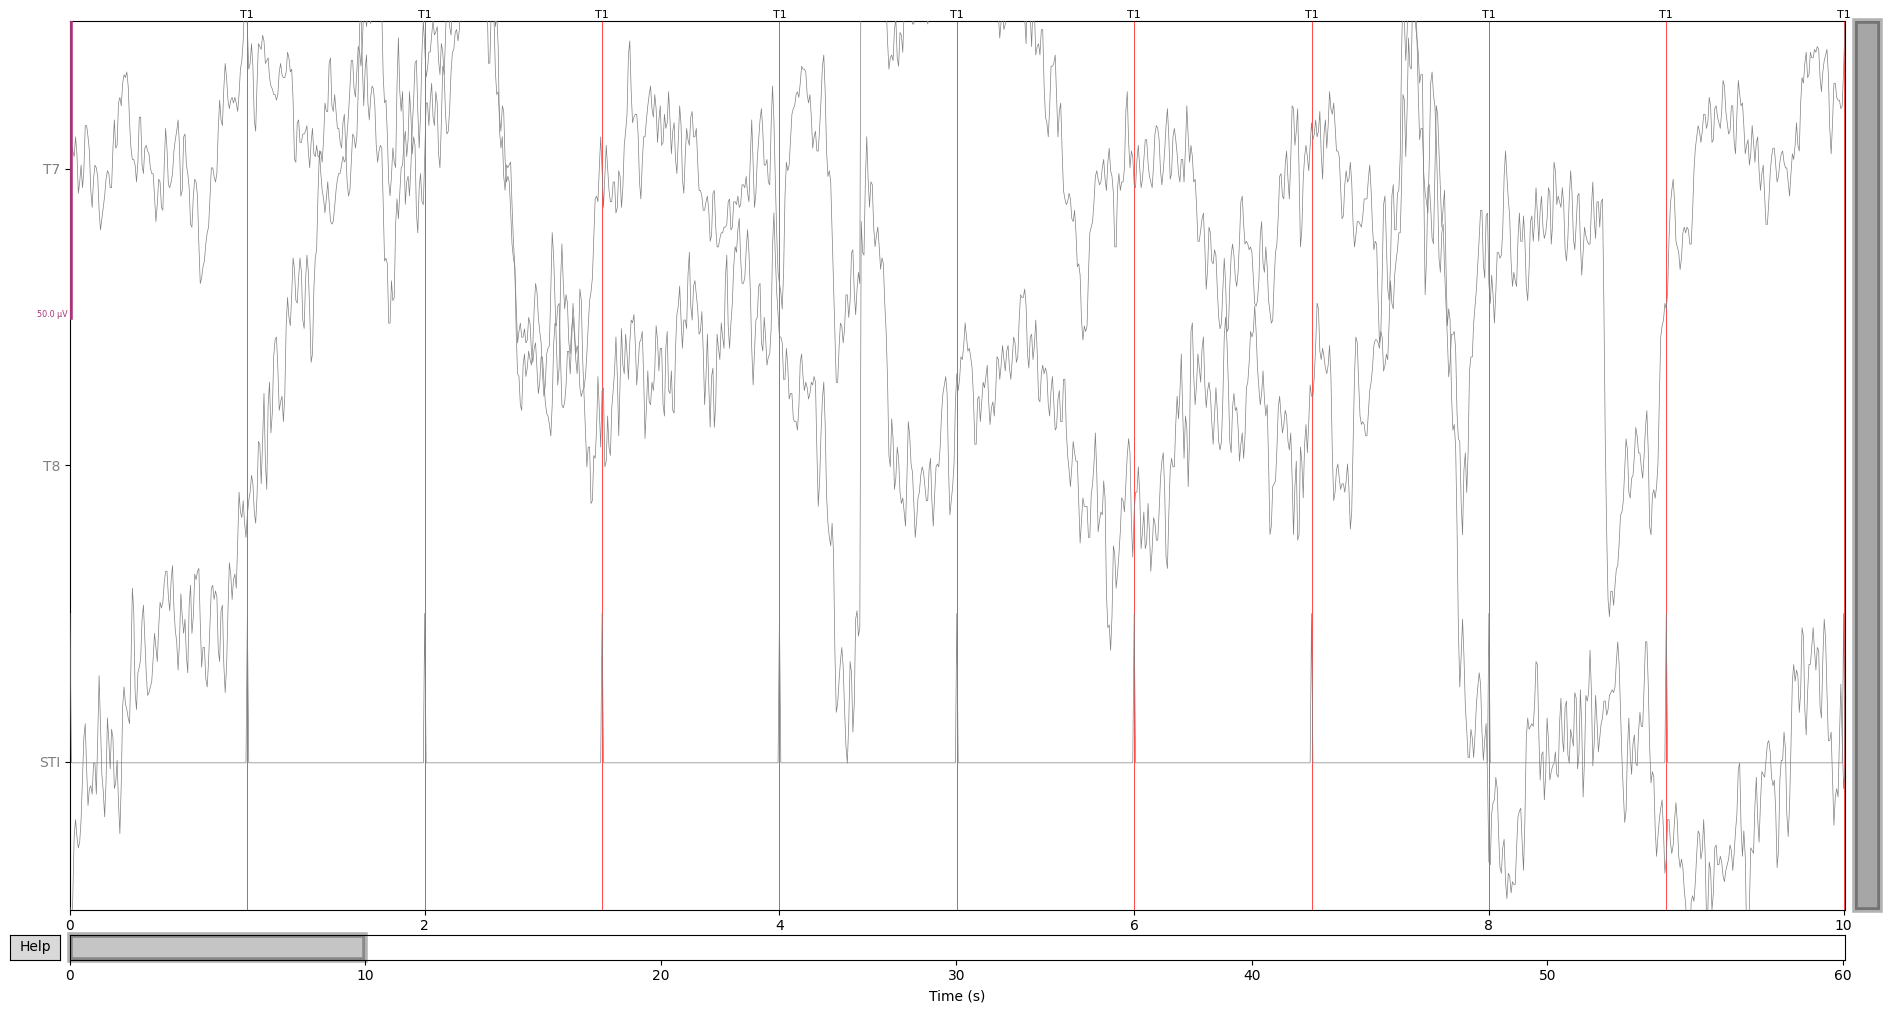

In [6]:
from mne import find_events

ev_ids = {'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4}
event_colors = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
stim_channel = 'STI'
events = find_events(rec, stim_channel=stim_channel)
rec.plot(events=events, event_id=ev_ids, event_color=event_colors, color = 'Gray', block = True, clipping=None, scalings=25e-6)
plt.show()

Not setting metadata
63 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 63 events and 180 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 20 events and 180 original time points ...


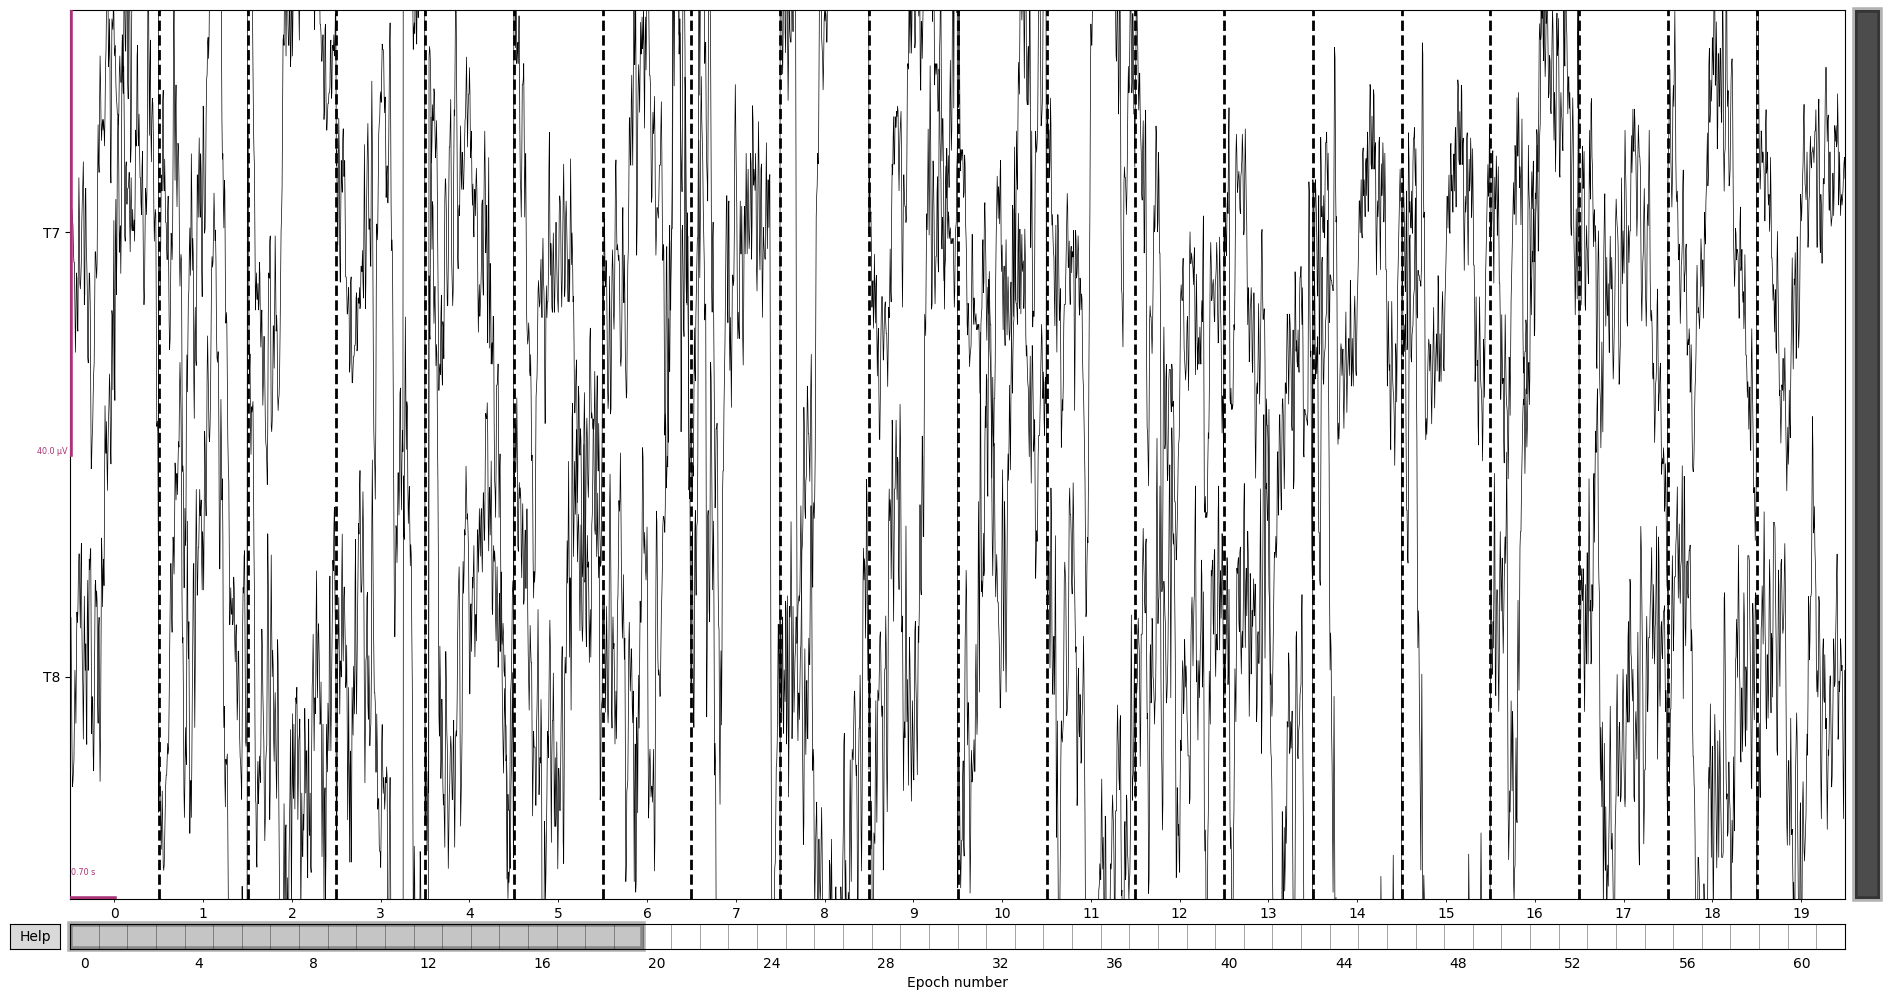

In [7]:
# creating the Epochs object combining EEG data and events info
from mne import Epochs

eps = Epochs(rec, events, event_id=ev_ids,
             tmin=-.6, tmax=0.8, baseline=(-.6,-.1))
            
eps.plot(block=True)# .plot() method for Epoch objects has not clipping parameter
plt.show()

Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


C:\Users\miche\AppData\Local\Temp\ipykernel_48716\2277375585.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


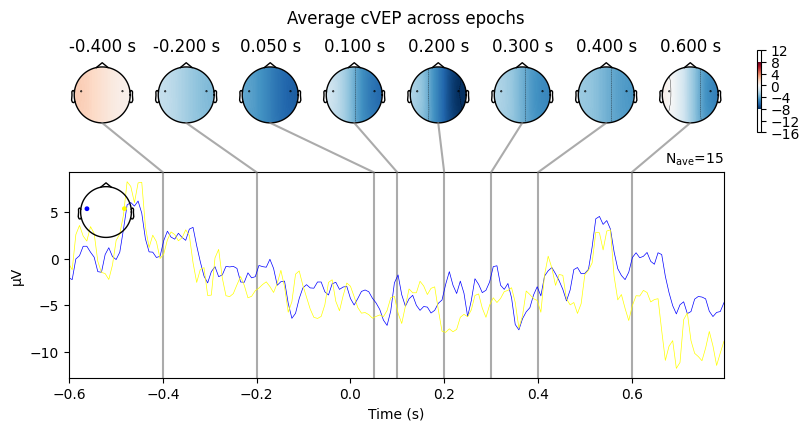

In [8]:
# Back to inline plotting
%matplotlib inline

# Choose target
target = "T4"

# Baseline period
baseline=(-.6,-.1)

# Average epochs across specified channels
average_channels = eps[target].average(picks=chs)
average_channels.apply_baseline(baseline)
fig = average_channels.plot_joint(times=[-0.4, -0.2, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6], title="Average cVEP across epochs", show=False)
fig.show()

Using data from preloaded Raw for 15 events and 180 original time points ...
Applying baseline correction (mode: mean)
No baseline correction applied


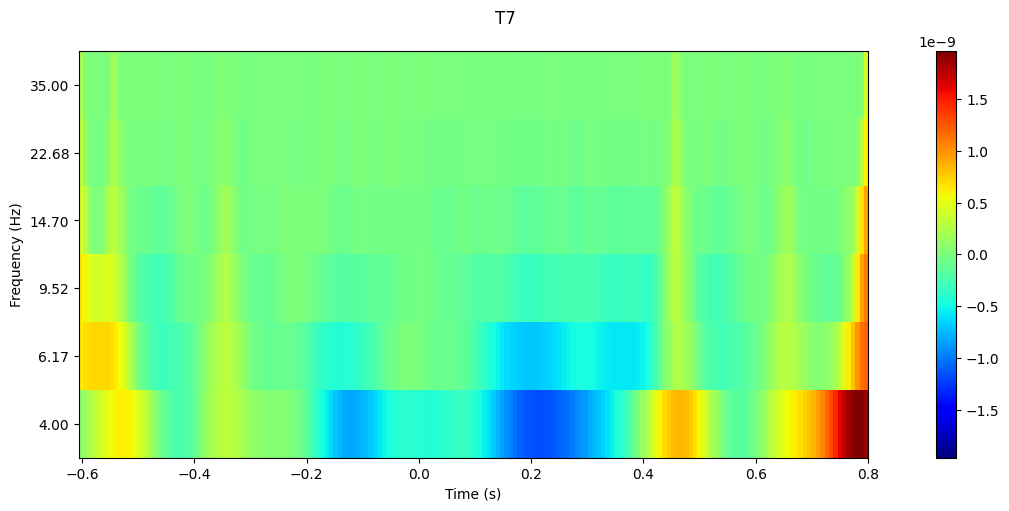

No baseline correction applied


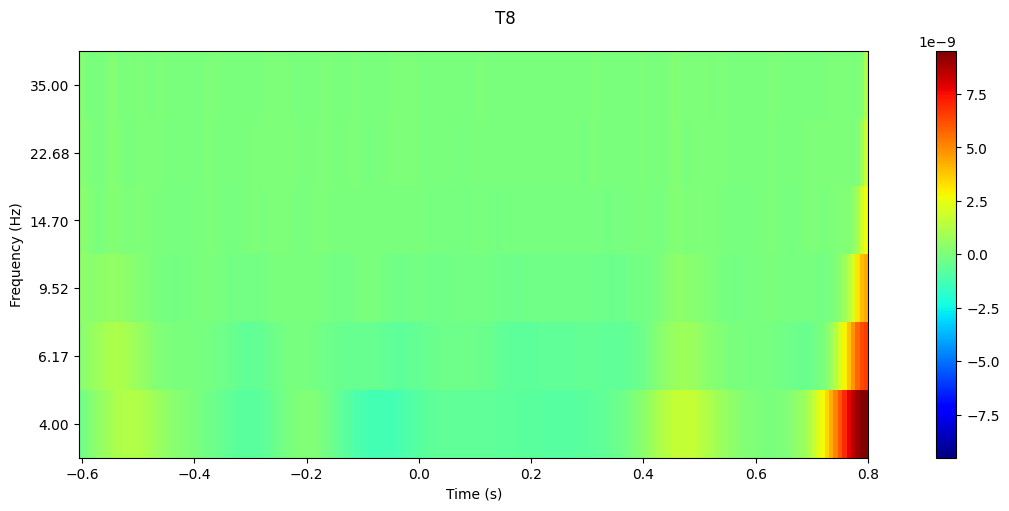

In [9]:
# Morlet wavelets
from mne.time_frequency import tfr_morlet
#Choose target
target = "T1"

# create a time-frequency representation using Morlet wavelets
freqs = np.logspace(*np.log10([4, 35]), num=6)
tfr, itc = tfr_morlet(eps[target], freqs, n_cycles=2, average=True, return_itc=True)

# Apply baseline correction using mean power in the time range of interest
baseline=(-.6,-.1)
tfr.apply_baseline(baseline, mode='mean')

for channel in chs:
    try:
        tfr.plot(mode='zlogratio', picks=channel, fmin=1, fmax=35, cmap='jet', title=channel)
        plt.show()
    except Exception as e:
        print(e)

Using data from preloaded Raw for 15 events and 180 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows

PSDs shape: (15, 2, 91), freqs shape: (91,)
    Using multitaper spectrum estimation with 7 DPSS windows


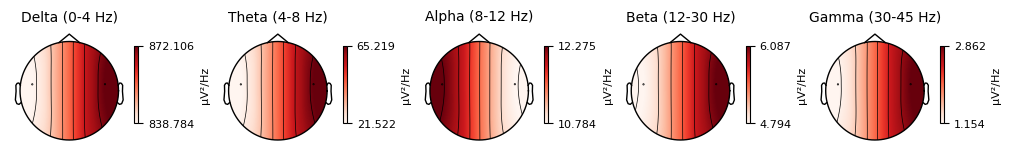

C:\Users\miche\AppData\Local\Temp\ipykernel_48716\3080263837.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [10]:
# Plot topographic maps
target = 'T1'
epo_spectrum = eps[target].compute_psd()
psds, freqs = epo_spectrum.get_data(return_freqs=True)
print(f'\nPSDs shape: {psds.shape}, freqs shape: {freqs.shape}')
evoked = eps[target].average()
evk_spectrum = evoked.compute_psd()
fig = evk_spectrum.plot_topomap(ch_type='eeg', agg_fun=np.median)
fig.show()